# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 616


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [5]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

units = "metric"

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units={units}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        weather_response = requests.get(city_url)
        city_weather = weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | udachny
Processing Record 3 of Set 1 | karachi
Processing Record 4 of Set 1 | oltinko'l
Processing Record 5 of Set 1 | puerto deseado
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | port-aux-francais
Processing Record 8 of Set 1 | polyarnyy
Processing Record 9 of Set 1 | nova sintra
Processing Record 10 of Set 1 | chonchi
Processing Record 11 of Set 1 | puerto baquerizo moreno
Processing Record 12 of Set 1 | new norfolk
Processing Record 13 of Set 1 | kamaishi
Processing Record 14 of Set 1 | bilibino
Processing Record 15 of Set 1 | holualoa
Processing Record 16 of Set 1 | juneau
Processing Record 17 of Set 1 | port alfred
Processing Record 18 of Set 1 | mana
Processing Record 19 of Set 1 | kingston
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | cabo san lucas
Processing Record 22 of Set 1 | forster
Processing

In [6]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame.from_dict(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [7]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,-2.36,72,21,9.44,GS,1729713677
1,udachny,66.4167,112.4000,-15.53,98,99,1.21,RU,1729713677
2,karachi,24.9056,67.0822,25.90,61,0,2.06,PK,1729713499
3,oltinko'l,40.8011,72.1634,12.86,79,95,1.17,UZ,1729713677
4,puerto deseado,-47.7503,-65.8938,11.26,60,11,5.75,AR,1729713677


In [8]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [9]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-2.36,72,21,9.44,GS,1729713677
1,udachny,66.4167,112.4000,-15.53,98,99,1.21,RU,1729713677
2,karachi,24.9056,67.0822,25.90,61,0,2.06,PK,1729713499
3,oltinko'l,40.8011,72.1634,12.86,79,95,1.17,UZ,1729713677
4,puerto deseado,-47.7503,-65.8938,11.26,60,11,5.75,AR,1729713677


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

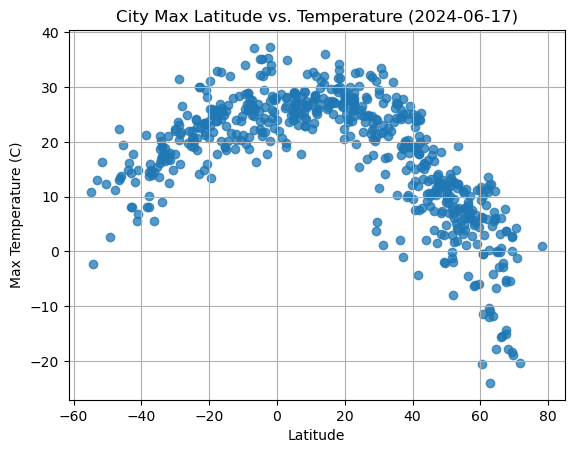

In [14]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], alpha=0.75)

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

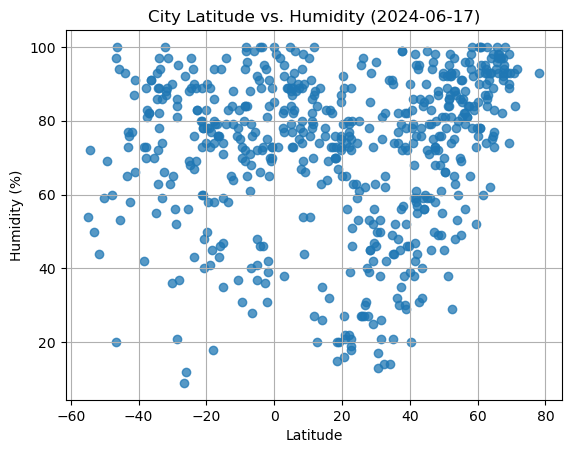

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

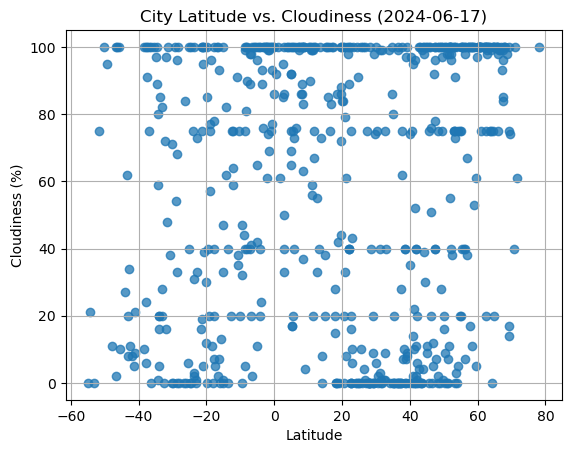

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

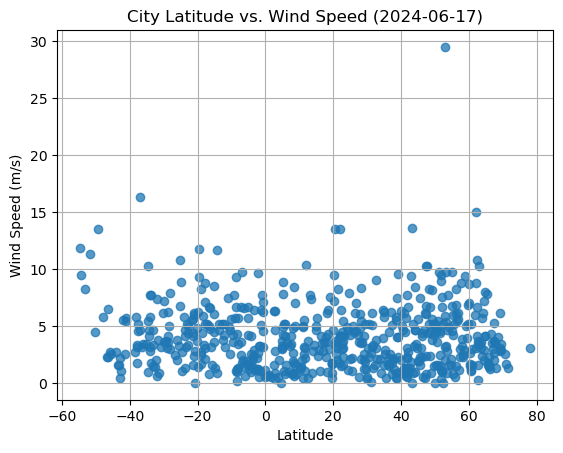

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (2024-06-17)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots

# slope = linregress(x_values, y_values)
# (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
# regress_values = x_values * slope + intercept
# line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,udachny,66.4167,112.4000,-15.53,98,99,1.21,RU,1729713677
2,karachi,24.9056,67.0822,25.90,61,0,2.06,PK,1729713499
3,oltinko'l,40.8011,72.1634,12.86,79,95,1.17,UZ,1729713677
5,albany,42.6001,-73.9662,25.19,31,4,1.34,US,1729713677
7,polyarnyy,69.1989,33.4478,2.72,89,17,2.84,RU,1729713678


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[pd.to_numeric(city_data_df["Lat"]) < 0, :]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,-2.36,72,21,9.44,GS,1729713677
4,puerto deseado,-47.7503,-65.8938,11.26,60,11,5.75,AR,1729713677
6,port-aux-francais,-49.3500,70.2167,2.63,69,95,13.52,TF,1729713678
9,chonchi,-42.6128,-73.8092,17.84,58,11,1.03,CL,1729713678
10,puerto baquerizo moreno,-0.9000,-89.6000,25.55,69,75,7.72,EC,1729713678


###  Temperature vs. Latitude Linear Regression Plot

The r^2 value is: 0.679


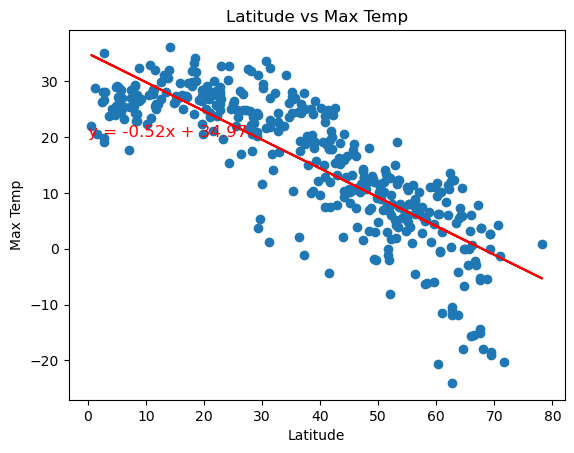

In [25]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)

regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (0,20), fontsize=12, color="red")

plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

r_squared = rvalue ** 2

print(f"The r^2 value is: {r_squared:.3f}")  


The r^2 value is: 0.541


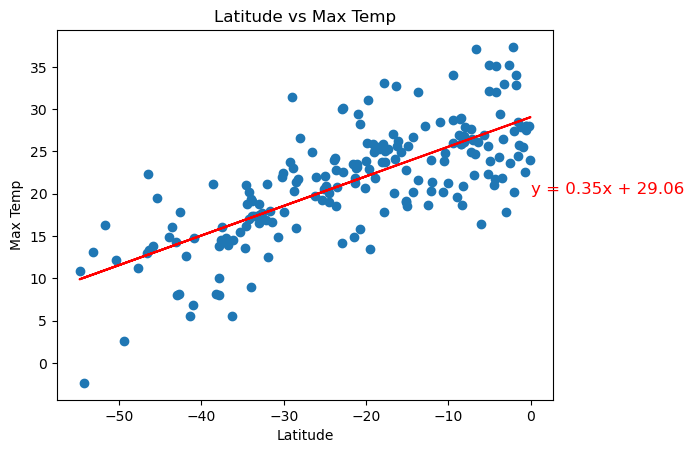

In [27]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq, (0,20), fontsize=12, color="red")

plt.title("Latitude vs Max Temp")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

r_squared = rvalue ** 2

print(f"The r^2 value is: {r_squared:.3f}") 

**Discussion about the linear relationship:** For discussions about linear relationships, I am using the designations I found online of: 0.00 to 0.19 very weak, 0.20 to 0.39 weak, 0.40 to 0.59 moderately, 0.60 to 0.70 strong, and 0.80 to 1.00 very strong.

There is a strong positive correlation between Latitude and Maximum Temperature in the Northern Hemisphere (0.679). There is a moderately positive correlation in the Southern Hemisphere (0.541). 

### Humidity vs. Latitude Linear Regression Plot

The r^2 value is: 0.058


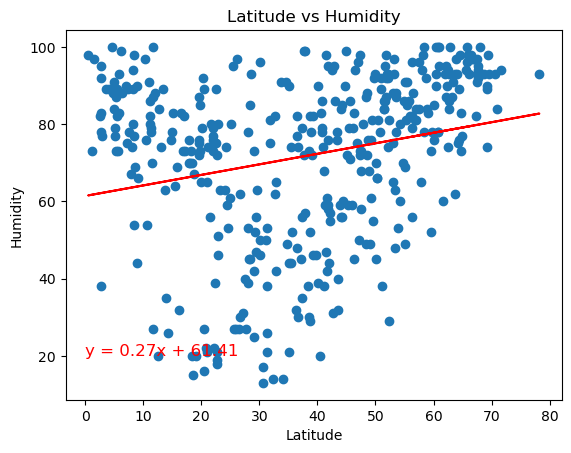

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,20), fontsize=12, color="red")

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

r_squared = rvalue ** 2

print(f"The r^2 value is: {r_squared:.3f}") 

The r^2 value is: 0.000


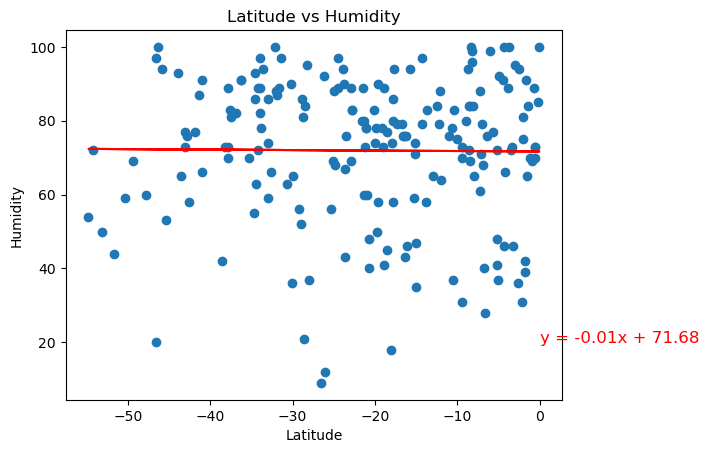

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,20), fontsize=12, color="red")

plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

r_squared = rvalue ** 2

print(f"The r^2 value is: {r_squared:.3f}") 

**Discussion about the linear relationship:** For discussions about linear relationships, I am using the designations I found online of: 0.00 to 0.19 very weak, 0.20 to 0.39 weak, 0.40 to 0.59 moderately, 0.60 to 0.70 strong, and 0.80 to 1.00 very strong.

There is a moderately positive correlation between Latitude and Humidity in the Northern Hemisphere (0.58) and no correlation in the Southern Hemisphere (0.00). However, the response of ZERO correlation could be an error in my data or code.

### Cloudiness vs. Latitude Linear Regression Plot

The r^2 value is: 0.010


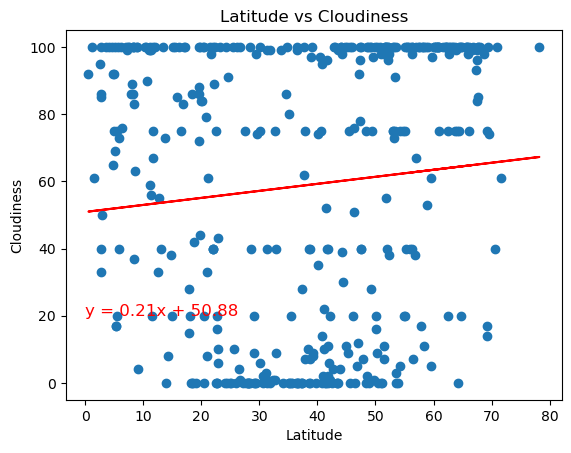

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,20), fontsize=12, color="red")

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

r_squared = rvalue ** 2

print(f"The r^2 value is: {r_squared:.3f}") 

The r^2 value is: 0.068


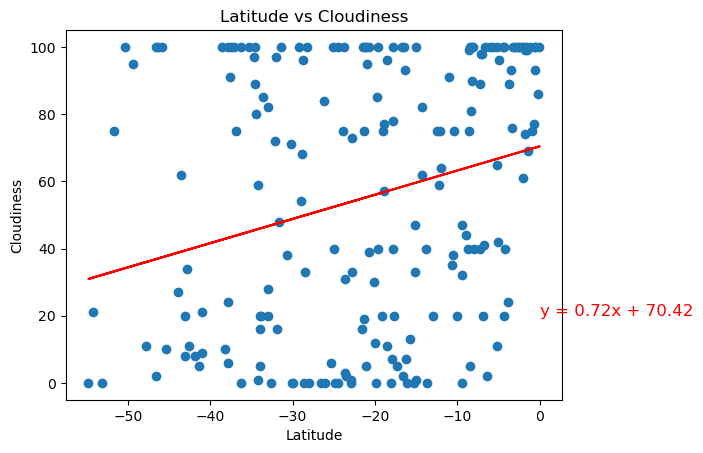

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,20), fontsize=12, color="red")

plt.title("Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

r_squared = rvalue ** 2

print(f"The r^2 value is: {r_squared:.3f}") 

**Discussion about the linear relationship:** For discussions about linear relationships, I am using the designations I found online of: 0.00 to 0.19 very weak, 0.20 to 0.39 weak, 0.40 to 0.59 moderately, 0.60 to 0.70 strong, and 0.80 to 1.00 very strong.

There is a very weak positive correlation between Latitude and Cloudiness in the Northern Hemisphere (0.010) and in the Southern Hemisphere (0.068).

### Wind Speed vs. Latitude Linear Regression Plot

The r^2 value is: 0.012


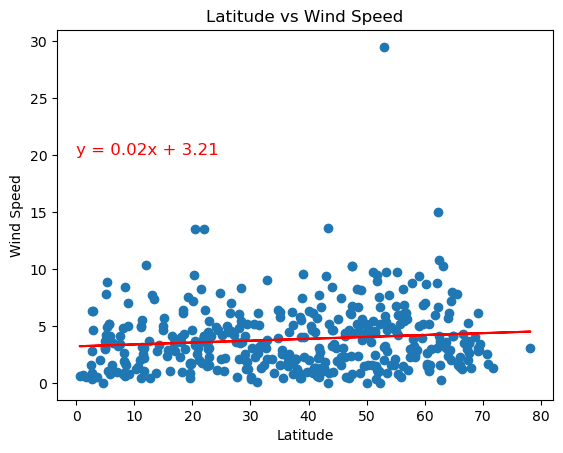

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,20), fontsize=12, color="red")

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

r_squared = rvalue ** 2

print(f"The r^2 value is: {r_squared:.3f}") 

The r^2 value is: 0.029


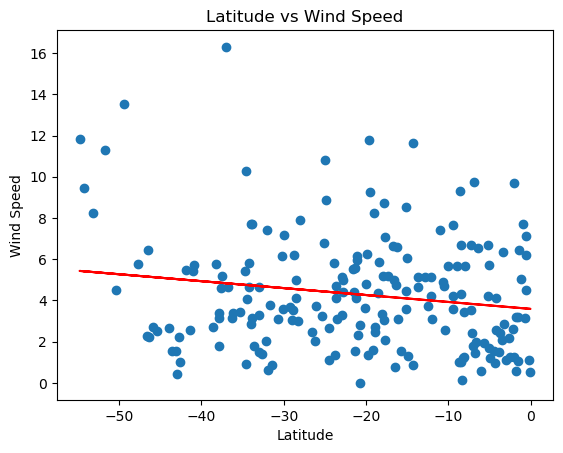

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
slope = linregress(x_values, y_values)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "-r")
plt.annotate(line_eq,(0,20), fontsize=12, color="red")

plt.title("Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

r_squared = rvalue ** 2

print(f"The r^2 value is: {r_squared:.3f}") 

**Discussion about the linear relationship:** For discussions about linear relationships, I am using the designations I found online of: 0.00 to 0.19 very weak, 0.20 to 0.39 weak, 0.40 to 0.59 moderately, 0.60 to 0.70 strong, and 0.80 to 1.00 very strong.


There is very weak correlation between Latitude and Wind Speed in the Northern Hemisphere (0.012) and the Southern Hemisphere (0.029).